<a href="https://colab.research.google.com/github/sudarsanragav/Machine-Learning/blob/sudarsanragav-DeepLearning-1/Digit_Classification_and_Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses
from sklearn.utils import shuffle


In [85]:
#fix random seed for reproducibility
import numpy as np
np.random.seed(5)

### Step 1 - Deciding on the Network Topology (not really considered optimization but is obviously very important)

we will use the MNIST dataset which consists of grayscale images of handwritten digits(0-9) whose dimesion of 28*28px.

In [86]:
#mnist = tf.keras.datasets.mnist
mnist = keras.datasets.mnist
(x_train,y_train),(x_test, y_test) = mnist.load_data()
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [87]:
print(y_train)

[5 0 4 ... 5 6 8]


Let's look at some 10 of the Images

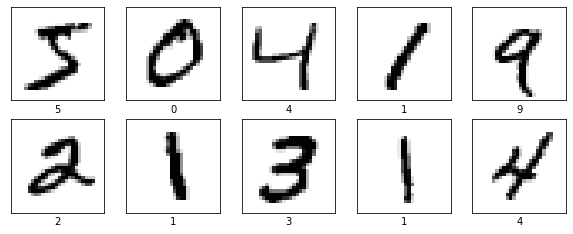

In [88]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
   plt.subplot(5,5,i+1)
   plt.xticks([])
   plt.yticks([])
   plt.grid(False)
   plt.imshow(x_train[i], cmap=plt.cm.binary)
   plt.xlabel(y_train[i])

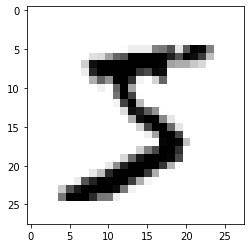

In [89]:
five = x_train[0].copy()
plt.imshow(five,cmap = plt.cm.binary)

[  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
 225 172 253 242 195  64   0   0   0   0]
[  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255   0   0   0   0]


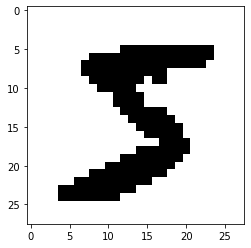

In [90]:
print(five[6])
five[five>0]=255
print(five[6])
# five[five<255]=255
# five[five == 255]=0


plt.imshow(five,cmap= plt.cm.binary)

In [91]:
print(f'We have {x_train.shape[0]} train Samples')
print(f'We have {x_test.shape[0]} test Samples')

We have 60000 train Samples
We have 10000 test Samples


### Preprocessing the Data

to run our NN we need to pre-process the data
                                                   First we need to make the 2D image arraysinto 1D(flatten them). We can either perform this by using array reshaping with numpy.reshape() or the keras' method for this: a layer called tf.keras.layers.Flatten which transforms the format of the images from a 2d-array(of 28 by 28 pixels), to a 1-D array of 28*28 = 784 pixels.

  Then we need to normalize the pixel values(give them values between 0 and 1) using the following tranformation:



In [92]:
# normalize the data
x_train, x_test = x_train/ 255.0,x_test/255.0

In [93]:
#reshape the data into 1D Vectors
 
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

num_classes = 10

In [94]:
x_train.shape[1]

784

Now let's prepare our vector(y) to a binary class matrix, eg for use with categorical_crossentropy

In [95]:
# Convert class vectors to binary class Matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [96]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Step - 2  Adjusting the Learning Rate

In [97]:
epochs = 60
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr = learning_rate, momentum= momentum, decay =decay_rate , nesterov = False )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [98]:
# build the  MOdel
input_dim = x_train.shape[1]

lr_model = Sequential()
lr_model.add(Dense(64, activation=tf.nn.relu, kernel_initializer='uniform',
                   input_dim = input_dim))
lr_model.add(Dropout(0.1))
lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
lr_model.add(Dense(num_classes, kernel_initializer='uniform',activation=tf.nn.softmax))
#compile the model
lr_model.compile(loss = 'categorical_crossentropy',
                 optimizer=sgd,
                 metrics=['acc'])

In [99]:
# %%time
#Fit the Model
batch_size = int(input_dim/100)

lr_model_history = lr_model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs,
                                verbose = 1,
                                validation_data=(x_test, y_test))

Epoch 1/60
8572/8572 [==============================] - 25s 3ms/step - loss: 0.3229 - acc: 0.9023 - val_loss: 0.1498 - val_acc: 0.9539
Epoch 2/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1623 - acc: 0.9512 - val_loss: 0.1346 - val_acc: 0.9601
Epoch 3/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1403 - acc: 0.9570 - val_loss: 0.1244 - val_acc: 0.9620
Epoch 4/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1300 - acc: 0.9600 - val_loss: 0.1159 - val_acc: 0.9650
Epoch 5/60
8572/8572 [==============================] - 16s 2ms/step - loss: 0.1226 - acc: 0.9622 - val_loss: 0.1136 - val_acc: 0.9655
Epoch 6/60
8572/8572 [==============================] - 15s 2ms/step - loss: 0.1170 - acc: 0.9643 - val_loss: 0.1120 - val_acc: 0.9657
Epoch 7/60
8572/8572 [==============================] - 15s 2ms/step - loss: 0.1135 - acc: 0.9657 - val_loss: 0.1099 - val_acc: 0.9664
Epoch 8/60
8572/8572 [==============================] -

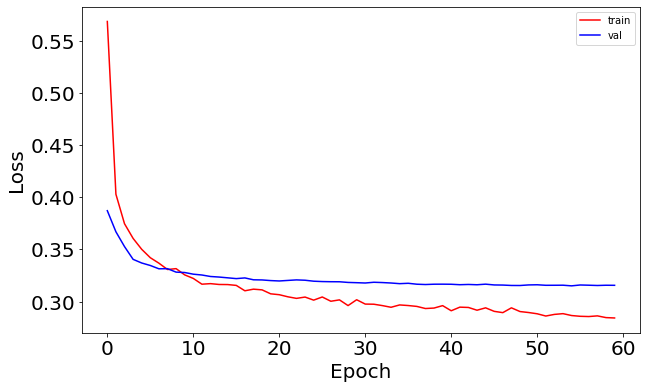

In [100]:
fig, ax = plt.subplots(1,1,  figsize= (10,6))
ax.plot(np.sqrt(lr_model_history.history['loss']),'r', label = 'train')
ax.plot(np.sqrt(lr_model_history.history['val_loss']),'b', label = 'val')
ax.set_xlabel(r'Epoch', fontsize = 20)
ax.set_ylabel(r'Loss', fontsize = 20)
ax.legend()
ax.tick_params(labelsize = 20)

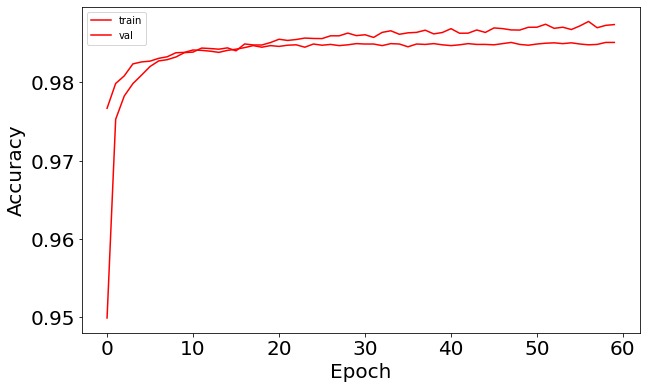

In [101]:
fig, ax = plt.subplots(1,1,  figsize= (10,6))
ax.plot(np.sqrt(lr_model_history.history['acc']),'r', label = 'train')
ax.plot(np.sqrt(lr_model_history.history['val_acc']),'r', label = 'val')
ax.set_xlabel(r'Epoch', fontsize = 20)
ax.set_ylabel(r'Accuracy', fontsize = 20)
ax.legend()
ax.tick_params(labelsize = 20)

In [102]:
#solution

epochs =30
learning_rate = 0.1 #initial learning rate
decay_rate = 0.1
momentum = 0.8

#define the optimizer function
sgd = SGD(lr= learning_rate, momentum= momentum, decay=decay_rate, nesterov = False) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [103]:
from keras.activations import exponential
input_dim = x_train.shape[1]
num_classes = 10
batch_size = 196

#build the model
exponential_decay_model = Sequential()
exponential_decay_model.add(Dense(64, activation = tf.nn.relu, kernel_initializer='uniform',
                                  input_dim = input_dim))
exponential_decay_model.add(Dropout(0.1))
exponential_decay_model.add(Dense(64, kernel_initializer='uniform',
                                  activation = tf.nn.relu))
exponential_decay_model.add(Dense(num_classes, kernel_initializer='uniform',
                                  activation = tf.nn.softmax))

#compile the model
exponential_decay_model.compile(loss='categorical_crossentropy',
                                optimizer=sgd,
                                metrics=['acc'])

In [104]:
#define the learning rate change

def exp_decay(epoch):
  lrate = learning_rate * np.exp(-decay_rate*epoch)
  return lrate


In [105]:
# learning Schedule callback
loss_history = History()
lr_rate = LearningRateScheduler(exp_decay)
callbacks_list = (loss_history, lr_rate)

#you involve the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = exponential_decay_model.fit(x_train, y_train,
                                                              batch_size = batch_size,
                                                              epochs =epochs,
                                                              callbacks=callbacks_list,
                                                              verbose = 1,
                                                              validation_data = (x_test,y_test))

Epoch 1/30
307/307 [==============================] - 2s 5ms/step - loss: 2.0425 - acc: 0.3176 - val_loss: 1.5878 - val_acc: 0.4763 - lr: 0.1000
Epoch 2/30
307/307 [==============================] - 1s 4ms/step - loss: 1.3366 - acc: 0.5753 - val_loss: 1.0956 - val_acc: 0.6682 - lr: 0.0905
Epoch 3/30
307/307 [==============================] - 1s 4ms/step - loss: 1.0611 - acc: 0.6647 - val_loss: 0.9327 - val_acc: 0.7179 - lr: 0.0819
Epoch 4/30
307/307 [==============================] - 1s 4ms/step - loss: 0.9524 - acc: 0.6960 - val_loss: 0.8572 - val_acc: 0.7414 - lr: 0.0741
Epoch 5/30
307/307 [==============================] - 1s 4ms/step - loss: 0.8991 - acc: 0.7126 - val_loss: 0.8152 - val_acc: 0.7513 - lr: 0.0670
Epoch 6/30
307/307 [==============================] - 1s 4ms/step - loss: 0.8637 - acc: 0.7238 - val_loss: 0.7890 - val_acc: 0.7608 - lr: 0.0607
Epoch 7/30
307/307 [==============================] - 1s 4ms/step - loss: 0.8442 - acc: 0.7305 - val_loss: 0.7708 - val_acc: 0.764

In [106]:
# build the Model 
input_dim = x_train.shape[1]

model = Sequential()
model.add(Dense(64, activation = tf.nn.relu, kernel_initializer='uniform',
                                  input_dim = input_dim))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='uniform',
                                  activation = tf.nn.relu))
model.add(Dense(num_classes, kernel_initializer='uniform',
                                  activation = tf.nn.softmax))


In [107]:
rms = RMSprop(lr = 0.001, rho = 0.9, epsilon = None , decay = 0.0)

model.compile(loss = 'categorical_crossentropy',
              optimizer = rms,
              metrics = ['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [108]:
batch_size= input_dim
epochs = 60

model_History = model.fit(x_train,y_train,batch_size= batch_size,epochs=epochs,
                         verbose= 1,validation_data=(x_test,y_test))

Epoch 1/60
77/77 [==============================] - 1s 12ms/step - loss: 1.0878 - acc: 0.7214 - val_loss: 0.5032 - val_acc: 0.8561
Epoch 2/60
77/77 [==============================] - 1s 10ms/step - loss: 0.4575 - acc: 0.8648 - val_loss: 0.3469 - val_acc: 0.9032
Epoch 3/60
77/77 [==============================] - 1s 10ms/step - loss: 0.3505 - acc: 0.8974 - val_loss: 0.2917 - val_acc: 0.9155
Epoch 4/60
77/77 [==============================] - 1s 10ms/step - loss: 0.2946 - acc: 0.9136 - val_loss: 0.2491 - val_acc: 0.9279
Epoch 5/60
77/77 [==============================] - 1s 10ms/step - loss: 0.2518 - acc: 0.9255 - val_loss: 0.2195 - val_acc: 0.9328
Epoch 6/60
77/77 [==============================] - 1s 10ms/step - loss: 0.2173 - acc: 0.9355 - val_loss: 0.1885 - val_acc: 0.9417
Epoch 7/60
77/77 [==============================] - 1s 10ms/step - loss: 0.1911 - acc: 0.9442 - val_loss: 0.1609 - val_acc: 0.9503
Epoch 8/60
77/77 [==============================] - 1s 10ms/step - loss: 0.1707 - a

In [109]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss', score[0])
print('Test accuracy', score[1])

Test loss 0.09476263076066971
Test accuracy 0.9768000245094299
